pyright:  reportUnusedExpression=false

Copyright (c) Microsoft Corporation. All rights reserved. Licensed under the MIT License.

# Capture the Flag Toy Example - Interactive (Human player)

This is a blank instantiaion of the Capture The Flag network to be played interactively by a human player (not via the gym envrionment).
The interface exposed to the attacker is given by the following commands:
    - c2.print_all_attacks()
    - c2.run_attack(node, attack_id)
    - c2.run_remote_attack(source_node, target_node, attack_id)
    - c2.connect_and_infect(source_node, target_node, port_name, credential_id)

In [1]:
import sys, logging
import cyberbattle.simulation.model as model
import cyberbattle.simulation.commandcontrol as commandcontrol
import cyberbattle.samples.toyctf.toy_ctf as ctf
import plotly.offline as plo

plo.init_notebook_mode(connected=True) # type: ignore
logging.basicConfig(stream=sys.stdout, level=logging.INFO, format="%(levelname)s: %(message)s")
%matplotlib inline

{}


In [2]:
network = model.create_network(ctf.nodes)
env = model.Environment(network=network, vulnerability_library=dict([]), identifiers=ctf.ENV_IDENTIFIERS)
env

Environment(network=<networkx.classes.digraph.DiGraph object at 0x7597a026be50>, vulnerability_library={}, identifiers=Identifiers(properties=['CTFFLAG:LeakedCustomerData', 'CTFFLAG:LeakedCustomerData2', 'CTFFLAG:Readme.txt-Discover secret data', 'CTFFLAG:VMPRIVATEINFO', 'GitHub', 'MySql', 'SasUrlInCommit', 'SharepointLeakingPassword', 'Ubuntu', 'nginx/1.10.3'], ports=['GIT', 'HTTPS', 'MySQL', 'PING', 'SSH', 'SSH-key', 'su'], local_vulnerabilities=['CredScan-HomeDirectory', 'CredScanBashHistory', 'SearchEdgeHistory'], remote_vulnerabilities=['AccessDataWithSASToken', 'CredScanGitHistory', 'ListAzureResources', 'NavigateWebDirectory', 'NavigateWebDirectoryFurther', 'ScanPageContent', 'ScanPageSource', 'ScanSharepointParentDirectory']), creationTime=datetime.datetime(2025, 9, 23, 14, 25, 42, 124436), lastModified=datetime.datetime(2025, 9, 23, 14, 25, 42, 124438), version='0.1.0')

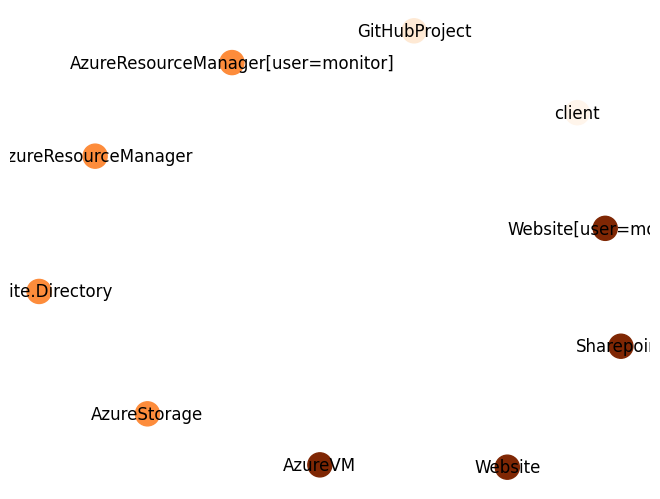

In [3]:
env.plot_environment_graph()

In [4]:
c2 = commandcontrol.CommandControl(env)
dbg = commandcontrol.EnvironmentDebugging(c2)


def plot():
    dbg.plot_discovered_network()
    c2.print_all_attacks()


plot()

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]


In [ ]:
# Initial discovery
c2.run_attack("client", "SearchEdgeHistory")

c2.run_remote_attack("client", "Website", "ScanPageContent")
c2.run_remote_attack("client", "Website", "ScanPageSource")

c2.run_remote_attack("client", "GitHubProject", "CredScanGitHistory")

c2.run_remote_attack("client", "GitHubProject", "CredScanGitHistory")

c2.run_remote_attack("client", "Website.Directory", "NavigateWebDirectory")
c2.run_remote_attack("client", "Website.Directory", "NavigateWebDirectoryFurther")

c2.run_remote_attack("client", "AzureStorage", "AccessDataWithSASToken")

c2.run_remote_attack("client", "Sharepoint", "ScanSharepointParentDirectory")

c2.run_remote_attack("client", "AzureResourceManager", "ListAzureResources")

print(c2.credentials_gathered_so_far)

# Spread
for creds in c2.credentials_gathered_so_far:
    c2.connect_and_infect("client", creds.node, creds.port, creds.credential)
plot()

INFO: discovered node: Website
INFO: GOT REWARD: Web browser history revealed website URL of interest
INFO: discovered node: GitHubProject
INFO: GOT REWARD: WEBSITE page content has a link to github -> Github project discovered!
INFO: discovered node: Website.Directory
INFO: GOT REWARD: Viewing the web page source reveals a URL to a .txt file and directory on the website
INFO: discovered node: AzureStorage
INFO: discovered credential: CachedCredential(node='AzureStorage', port='HTTPS', credential='SASTOKEN1')
INFO: GOT REWARD: CredScan success: Some secure access token (SAS) was leaked in a reverted git commit
INFO: discovered node: AzureStorage
INFO: discovered credential: CachedCredential(node='AzureStorage', port='HTTPS', credential='SASTOKEN1')
INFO: GOT REWARD: CredScan success: Some secure access token (SAS) was leaked in a reverted git commit
INFO: discovered node: Sharepoint
INFO: GOT REWARD: Navigating to parent URL revealed file `deprecation-checklist.txt` containinga URL to 

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Website.Directory,discovered,NaN,None,"[NavigateWebDirectory, NavigateWebDirectoryFur..."
AzureStorage,discovered,NaN,None,[AccessDataWithSASToken]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]
AzureResourceManager,discovered,NaN,None,[ListAzureResources]
AzureVM,discovered,NaN,None,[]
